<a href="https://colab.research.google.com/github/dstrick97/cse380-notebooks/blob/master/11_3_About_The_Petersen_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About The Petersen Graph
## Class Directed Learning
### Due: Tuesday, 16 March 2021, 11:59 pm

## TODO Explore and Wonder

The Petersen graph is described as the complement of the line graph of $K_5$.

Draw each step of this construction using any graph-drawing tools in your toolbox.

Teach one another how to use the tools you each have.

### Classes and Functions

In [ ]:
class GraphNode():
  def __init__(self, value = 0, links = []):
    self.value = value
    self.links = links

  def is_link(self, neighbor_value):
    if neighbor_value in links:
      return True
    return False

  def add_link(self, neighbor_value):
    if not neighbor_value in self.links:
      self.links.append(neighbor_value)

  def remove_link(self, neighbor_value):
    link.remove(neighbor_value)

  def __eq__(self, node):
    return self.value == node.value and set(self.links) == set(node.links)

In [ ]:
class Graph():
  def __init__(self, nodes = [], links = []):
    self.nodes = []
    for node in nodes:
      adjacent_nodes = [link[1] for link in links if link[0] == node] + [link[0] for link in links if link[1] == node]
      self.nodes.append(GraphNode(node, adjacent_nodes))

  def get_node(self, node_value):
    return next(graphNode for graphNode in self.nodes if graphNode.value == node_value)

  def get_nodes(self):
    return [node.value for node in self.nodes]

  def get_links(self):
    links = [str(adj_list[0]) + str(adjacent_node) for adj_list in self.get_adjacency_list() for adjacent_node in adj_list[1]]
    return list(set((link[:len(link)//2], link[len(link)//2:]) if link[:len(link)//2] < link[len(link)//2:] else (link[len(link)//2:], link[:len(link)//2]) for link in links))

  def get_adjacent_nodes(self, node_value):
    node = self.get_node(node_value)
    return (node.value, node.links)

  def get_adjacency_list(self):
    return [(graphNode.value, graphNode.links) for graphNode in self.nodes]

  def is_adjacent(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    return node.is_link(node_to)

  def add_node(self, node_value, links = []):
    if not node_value in self.get_nodes():
      self.nodes.append(GraphNode(node_value, links))

  def add_link(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    if not node.is_link(node_to):
      node.add_link(node_to)
    self.add_node(node_to)
    node = self.get_node(node_to)
    if not node.is_link(node_from):
      node.add_link(node_from)

In [ ]:
# https://graphviz.org/
# https://pypi.org/project/pygraphviz/
import graphviz

def display_links(links, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  graphic.edges(links)
  graphic.engine = engine
  return graphic

def display_graph(graph, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  graphic.edges([link[:len(link)//2] + link[len(link)//2:] for link in graph.get_links()])
  graphic.engine = engine
  return graphic

### $K_5$ Graph

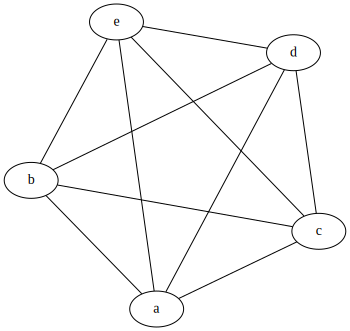

In [ ]:
nodes = ['a', 'b', 'c', 'd', 'e']
links = [
  ('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'e'), ('b', 'c'), ('b', 'd'),
  ('b', 'e'), ('c', 'd'), ('c', 'e'), ('d', 'e')
]

k5 = Graph(nodes, links)
display_graph(k5, 'sfdp')

### Converting $K_5$ into a line graph

['de', 'bd', 'ab', 'be', 'ad', 'cd', 'ae', 'ce', 'ac', 'bc']
[('bc', 'cd'), ('ab', 'bc'), ('ab', 'be'), ('bc', 'be'), ('bd', 'cd'), ('be', 'ce'), ('ac', 'ce'), ('ad', 'de'), ('ae', 'de'), ('bc', 'ce'), ('bd', 'de'), ('cd', 'ce'), ('ac', 'ad'), ('cd', 'de'), ('ab', 'ac'), ('ab', 'bd'), ('bc', 'bd'), ('ad', 'cd'), ('be', 'de'), ('ad', 'bd'), ('ae', 'ce'), ('ac', 'bc'), ('ac', 'ae'), ('ce', 'de'), ('bd', 'be'), ('ab', 'ae'), ('ae', 'be'), ('ad', 'ae'), ('ab', 'ad'), ('ac', 'cd')]


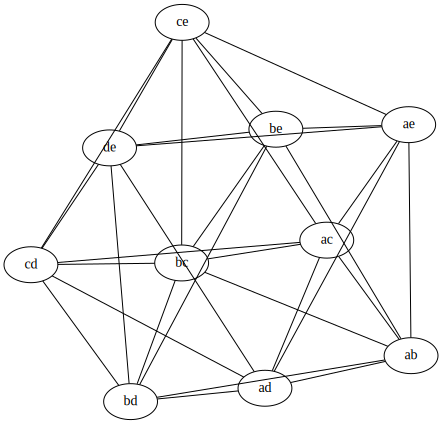

In [ ]:
# Following the steps outlined here:
# https://en.wikipedia.org/wiki/Line_graph

# I am going to want this:
def generate_complete_graph_links(nodes):
  links = []
  for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
      # Let's sort these as we go for simplicity
      links.append((nodes[i], nodes[j]) if nodes[i] < nodes[j] else (nodes[j], nodes[i]))
  return links

# Step 1: Add verticies constructed from the edges of K5
verticies = [str(link[0]) + str(link[1]) for link in k5.get_links()]
line_graph = Graph(verticies)

# Step 2: Add edges
edges = []
for node in k5.get_nodes():
  node_verticies = [vertex for vertex in verticies if node in vertex]
  edges += generate_complete_graph_links(node_verticies)

# Step 3: Remove original nodes
# This is fulfilled since we are creating a brand new graph without
#  any of the previous nodes
line_graph = Graph(verticies, edges)

# Show results
print(line_graph.get_nodes())
print(line_graph.get_links())
display_graph(line_graph, 'sfdp')

### Complementing the line graph

45 - 30 = 15
[('ab', 'cd'), ('ab', 'de'), ('ae', 'bd'), ('bc', 'de'), ('ae', 'cd'), ('ac', 'bd'), ('bd', 'ce'), ('ae', 'bc'), ('ac', 'be'), ('ad', 'ce'), ('be', 'cd'), ('ac', 'de'), ('ad', 'bc'), ('ab', 'ce'), ('ad', 'be')]


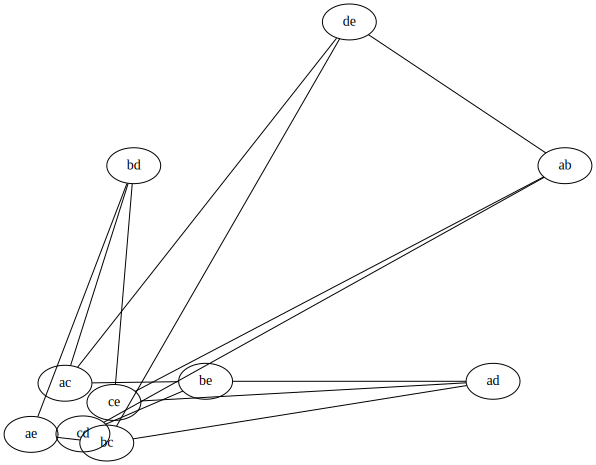

In [ ]:
# I will need this:
def display_graph_as_peterson(graph):
  graphic = graphviz.Graph(format='png')
  nodes = graph.get_nodes()
  # Display the first 5 nodes in a pentagon shape
  graphic.node(nodes[0], pos='7,8!')
  graphic.node(nodes[1], pos='4,6!')
  graphic.node(nodes[2], pos='10,6!')
  graphic.node(nodes[3], pos='5,3!')
  graphic.node(nodes[4], pos='9,3!')
  graphic.edges([link[:len(link)//2] + link[len(link)//2:] for link in graph.get_links()])
  graphic.engine = 'neato'
  return graphic

complete_graph_links = generate_complete_graph_links(line_graph.get_nodes())
complement_links = list(set(complete_graph_links).difference(set(line_graph.get_links())))

print(f'{len(set(complete_graph_links))} - {len(set(line_graph.get_links()))} = {len(complement_links)}')
print(complement_links)

complement = Graph(line_graph.get_nodes(), complement_links)
display_graph_as_peterson(complement)

### Peterson Graph

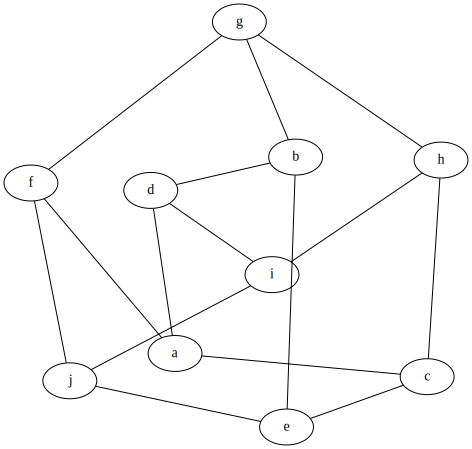

In [ ]:
# Compare the above graph with the Peterson graph.
# They should be identical (except for the node names).

peterson = ['af', 'ac', 'ad', 'bg', 'bd', 'be', 'ch', 'ce', 'di', 'ej', 'fg', 'fj', 'gh', 'hi', 'ij']
display_links(peterson, 'sfdp')